##Dataset
#####*Twitter Disaster Dataset*

Data to predict whether a tweet was about a real disaster or not. Data was sourced from a kaggle competition. You can find it on https://www.kaggle.com/datasets/dipankarmitra/natural-language-processing-with-disaster-tweets. 

We have to classify a tweet into: 
Disaster tweet: The tweet is related to a real disaster
Fake: The tweet is not related to one.

Example:

Sentence1:"major fires burned in the Amazon "<br>
Sentence2: "Adele's ,set fire to the rain tops the billboard" 


We have also shared that data with you on **Google Drive**

### Loading Data  

In [ ]:
# Mount google drive to import data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# unzip the folder from drive to local space on colab
!unzip -q "/content/gdrive/MyDrive/Workshop/nlp-getting-started.zip" 

In [ ]:
#import pandas
import pandas as pd

#Read data in to a pandas dataframe
df = pd.read_csv('/content/train.csv')

In [ ]:
#Shape of the dataframe
df.shape

(7613, 5)

In [ ]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Let's take a look at the details of our data
#the columns, their types, Number of non-null values, memory usage etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
#drop the columns which have Null values
df = df.dropna(how="any", axis=1)

In [ ]:
#-----------------TODO--------------------#
# Print the Updated Shape of the Dataframe after removing Null values

#ENTER YOUR CODE BELOW
df.shape

(7613, 3)

In [ ]:
#print the row number 451 using .loc

#ENTER YOUR CODE HERE
df.loc[451]

id                                                      654
text      it scares me that there's new versions of nucl...
target                                                    1
Name: 451, dtype: object

In [ ]:
#print the text in index 451

#ENTER YOUR CODE HERE
df["text"][451]

"it scares me that there's new versions of nuclear attack warnings like just knowing that governments still prepare for them"

### Exploratory Data Analysis

In [ ]:
#Group the data on the basis of the label
balance_counts = df.groupby('target')['target'].agg('count').values
balance_counts

array([4342, 3271])

In [ ]:
#import library
from plotly import graph_objs as go
#Plot the labels frequency
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Fake'],
    y=[balance_counts[0]],
    name='Fake',
    text=[balance_counts[0]],
    textposition='auto'
   
))
fig.add_trace(go.Bar(
    x=['Real disaster'],
    y=[balance_counts[1]],
    name='Real disaster',
    text=[balance_counts[1]],
    textposition='auto'
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target value</span>',
    height=400, width=600
)
fig.show()

In [ ]:
#Calculate length of tweets and imsert in new column 'text_len'
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
print(df.head())

#Maximum Length
print('\n')
print("Max Length of Tweet:",max(df['text_len']))

   id                                               text  target  text_len
0   1  Our Deeds are the Reason of this #earthquake M...       1        13
1   4             Forest fire near La Ronge Sask. Canada       1         7
2   5  All residents asked to 'shelter in place' are ...       1        22
3   6  13,000 people receive #wildfires evacuation or...       1         9
4   7  Just got sent this photo from Ruby #Alaska as ...       1        17


Max Length of Tweet: 54


In [ ]:
disaster_df = df[df['target'] == 1]['text_len'].value_counts().sort_index()
fake_df = df[df['target'] == 0]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=disaster_df.index,
    y=disaster_df.values,
    name='Real disaster',
    fill='tozeroy'
))
fig.add_trace(go.Scatter(
    x=fake_df.index,
    y=fake_df.values,
    name='Fake',
    fill='tozeroy'
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Tweets Length in Two Groups</span>',
    height=400, width=600
)
fig.show()

### Data Pre-processing
In Natural Language Processing (NLP), pre-processing is an important step where things like text cleaning, stemming, etc takes place. Among these various facets of NLP pre-processing, We will be covering the following:
- Text Cleaning
- Stopwords removal
- Stemming 
- Lemmatization

**Text Cleaning** refers to the process of removing or transforming certain parts of the text so that the text becomes more easily understandable for NLP models that are learning the text. This often enables NLP models to perform better by ***reducing noise*** in text data. This can include removing:
- Punctuation 
- Capitalization
- Numbers
- Links/Urls
- Emojis
- Irrelevant Tokens

In [ ]:
#import re for regular expression
import re

#import string for string functions
import string

# Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    #Lower Case
    text = str(text).lower()

    #Remove links starting with https/www
    text = re.sub('https?://\S+|www\.\S+', '', text)

    #Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    #Remove new line character
    text = re.sub('\n', '', text)

    #Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    return text

**Stopwords** are common words that do not carry significant meaning and are usually removed from texts in natural language processing (NLP) tasks. These words are usually pronouns, prepositions, and conjunctions, such as "the," "a," "an," "in," "on," and so on.

The removal of stop words is important in NLP for several reasons:
1.	Stop words **do not contribute much to the meaning of a text** and can be safely removed without affecting the overall context. Removing stop words helps to reduce the size of the dataset and can make NLP tasks more efficient.
2.	Stop words **can often dominate the word count in a text**, especially in longer documents. This can skew the results of certain NLP techniques that rely on the frequency of words in a text. Removing stop words can help to balance the word frequencies and give more weight to important content words.
3.	Some NLP techniques, such as text **classification and sentiment analysis, rely on the presence or absence of specific words to make a prediction**. Stop words can often interfere with these techniques and may need to be removed to improve the accuracy of the model.
Overall, the removal of stop words is a common preprocessing step in NLP tasks because it helps to improve the efficiency and accuracy of the analysis.


In [ ]:
#Import nltk and stopwrods file directory
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#load the english language stop words list
stop_words = stopwords.words('english')

#We can also add more stopwords according to our data/problem
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Define a function to remove the stop words from the corpus
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

**Stemming and Lemmatization** are NLP techniques to convert the different forms of the same word to its root form. Key difference is the way they do it.  

Stemming work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. 

<img src='https://drive.google.com/uc?id=10nIJdYszvJ4O7CBGnL2PRX7ieJSivXd9' height='170px' width='430px'>

**Lemmatization**  on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

<img src='https://drive.google.com/uc?id=1O8C9RPYkXUDX1QIvy3oL5Ryfg8rathaw' height='170px' width='430px'>


<img src='https://drive.google.com/uc?id=15nCMLYzQQIO1VjRS3zoAX-2N8d_kKXwF' height='270px' width='530px'>


In [ ]:
#Import a stemmer from nltk
from nltk.stem.porter import PorterStemmer

#Initialize the Porter Stemmer Object
stemmer = PorterStemmer()

#define the function to stem the words in the corpus
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

###Performing all the preprocessing steps at once

In [ ]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)

    # Remove stopwords
    text = remove_stopwords(text)

    # Stemm all the words in the sentence
    text = stemm_text(text)
    
    return text

In [ ]:
df['text_clean'] = df['text'].apply(preprocess_data)
df.head()

,id,text,target,text_len,text_clean
0,1,Our Deeds are the Reason of this #earthquake M...,1,13,deed reason earthquak may allah forgiv us
1,4,Forest fire near La Ronge Sask. Canada,1,7,forest fire near la rong sask canada
2,5,All residents asked to 'shelter in place' are ...,1,22,resid ask shelter place notifi offic evacu she...
3,6,"13,000 people receive #wildfires evacuation or...",1,9,peopl receiv wildfir evacu order california
4,7,Just got sent this photo from Ruby #Alaska as ...,1,17,got sent photo rubi alaska smoke wildfir pour ...


### **Vectorization - Text Representation** 
####**Bag of Words representation**
The **bag-of-words (BOW)** model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as **vectorization**.

Let’s understand this with an example. Suppose we wanted to vectorize the following:

- `the cat sat`
- `the cat sat in the hat`
- `the cat with the hat`

We’ll refer to each of these as a text document.

**Step 1:** 
We first define our vocabulary, which is the set of all words found in our document set. The only words that are found in the 3 documents above are: `the`, `cat`, `sat`, `in`, `the`, `hat`, and `with`.

**Step 2:** 
To vectorize our documents, all we have to do is count how many times each word appears.
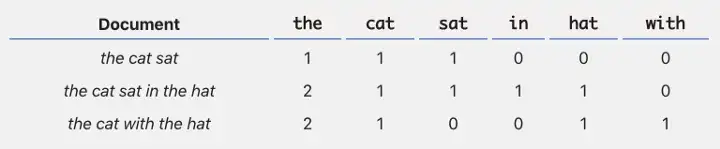

Now we have length-6 vectors for each document!

- the cat sat: `[1, 1, 1, 0, 0, 0]`
- the cat sat in the hat: `[2, 1, 1, 1, 1, 0]`
- the cat with the hat: `[2, 1, 0, 0, 1, 1]`


Notice that we lose contextual information, e.g. where in the document the word appeared, when we use BOW. It’s like a literal bag-of-words: it only tells you what words occur in the document, not where they occurred.

For our task today we will be using CountVectorizer which is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

### TF-IDF
Term Frequency-Inverse Document Frequency (TF-IDF) is a variant of BOW that weighs the words in a text based on their importance to the document. It takes into account both the frequency of a word in the text (term frequency) and how rare the word is across all documents (inverse document frequency). Words that are more common across all documents are given a lower weight, whereas words that are rare or specific to a particular document are given a higher weight.


In [ ]:
Document1= "the squids jumped."
Document2= "the squids ate."
Document3= "the squids learned"
Doc = [Document1 ,
 Document2 , 
 Document3]
print(Doc)

['the squids jumped.', 'the squids ate.', 'the squids learned']


tf and idf will be calculated as:

**TF** = *(Number of repetitions of word in a document) / (Total Number of words in a document)*


**IDF** =*Log [(Total Number of documents in the corpus) / (Number of documents containing the word)]*


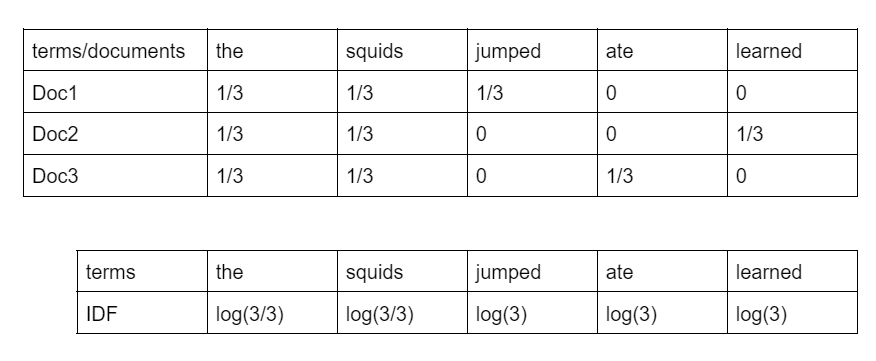

In [ ]:
#Import TfidfVectorizer from the sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the Vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
#Create the tf.idf matrix
X = vectorizer.fit_transform(Doc)

#print the matrix
print(vectorizer.get_feature_names_out())

print('\n')
print('tf.idf matrix of three documents')
X.toarray()

['ate' 'jumped' 'learned' 'squids' 'the']


tf.idf matrix of three documents


array([[0.        , 0.76749457, 0.        , 0.45329466, 0.45329466],
       [0.76749457, 0.        , 0.        , 0.45329466, 0.45329466],
       [0.        , 0.        , 0.76749457, 0.45329466, 0.45329466]])

In [ ]:
print(X)

  (0, 1)	0.7674945674619879
  (0, 3)	0.4532946552278861
  (0, 4)	0.4532946552278861
  (1, 0)	0.7674945674619879
  (1, 3)	0.4532946552278861
  (1, 4)	0.4532946552278861
  (2, 2)	0.7674945674619879
  (2, 3)	0.4532946552278861
  (2, 4)	0.4532946552278861


In [ ]:
#let's apply the vectorizer on our tweets dataset

#-----------------TODO---------------*
#Apply the fit_transform on the clean tweets text

X = vectorizer.fit_transform(df['text_clean'])
X.toarray()

<7613x13528 sparse matrix of type '<class 'numpy.float64'>'
	with 65708 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#import numpy to convert the matrix in an array
import numpy as np

#----------------TODO--------------*

#print the first tweet (clean)
print(df['text_clean'][0])

#Convert X to array using toarray() and print the unique values of the first tweet using np.unique()
#INSERT YOUR CODE HERE
np.unique(X.toarray()[0])

deed reason earthquak may allah forgiv us


array([0.        , 0.26474978, 0.29543517, 0.326854  , 0.35041027,
       0.41704473, 0.46073613, 0.4762359 ])

##**Reading Material**

###**Text Cleaning**
* https://towardsdatascience.com/primer-to-cleaning-text-data-7e856d6e5791

###**Stop Wrods**
* https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214

###**Stemming & Lemmatization**
* https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html   
* https://en.wikipedia.org/wiki/Lemmatisation
* https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/#:~:text=Stemming%20and%20lemmatization%20are%20methods,the%20word%20is%20being%20used.
* https://en.wikipedia.org/wiki/Stemming   
* https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/#:~:text=Stemming%20is%20a%20natural%20language,and%20documents%20for%20text%20normalization.
* https://www.geeksforgeeks.org/introduction-to-stemming/
* https://www.turing.com/kb/stemming-vs-lemmatization-in-python

###**Bag of Words (BOW)**:
* https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

###**Tf.Idf**:
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
* https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275